## Setup

Imports and configurations necessary to run the notebook from any machine.

In [48]:
#Includes the  packages for the project

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import pycountry
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import  mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


## Data Load

Instructions on how to download and/or upload the data.

In [12]:

data = pd.read_csv('https://raw.githubusercontent.com/luisfp2000/proyecto_final/main/Baseline/Dataset/ds_salaries.csv')


### Description dataset
Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year.
    - EN > Entry-level / Junior
    - MI > Mid-level / Intermediate
    - SE > Senior-level / Expert
    - EX > Executive-level / Director
3. employment_type: The type of employment for the role.
    - PT > Part-time
    - FT > Full-time
    - CT > Contract
    - FL > Freelance
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD.
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely.
10. company_location: The country of the employer's main office or contracting branch.
11. company_size: The median number of people that worked for the company during the year.

In [13]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [14]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [15]:
data.info()
# There are no null values ​​in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [16]:
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

## Data Transformation Exploration

Data analysis with statistical and visualization methods.

In [17]:
# Transformation of the codes of the categorical variables

data['experience_level'] = data['experience_level'].replace({'SE': 'Expert', 'MI': 'Intermediate', 'EN': 'Junior', 'EX': 'Director'})

data['employment_type'] = data['employment_type'].replace({'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance', 'PT': 'Part-time'})

def country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return 'other'
    
data['company_location'] = data['company_location'].apply(country_name)
data['employee_residence'] = data['employee_residence'].apply(country_name)

In [18]:
# Categorical variables

for column in ['work_year','experience_level','employment_type','company_size','remote_ratio','job_title','company_location']:
    print(data[column].unique())

[2023 2022 2020 2021]
['Expert' 'Intermediate' 'Junior' 'Director']
['Full-time' 'Contract' 'Freelance' 'Part-time']
['L' 'S' 'M']
[100   0  50]
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Le

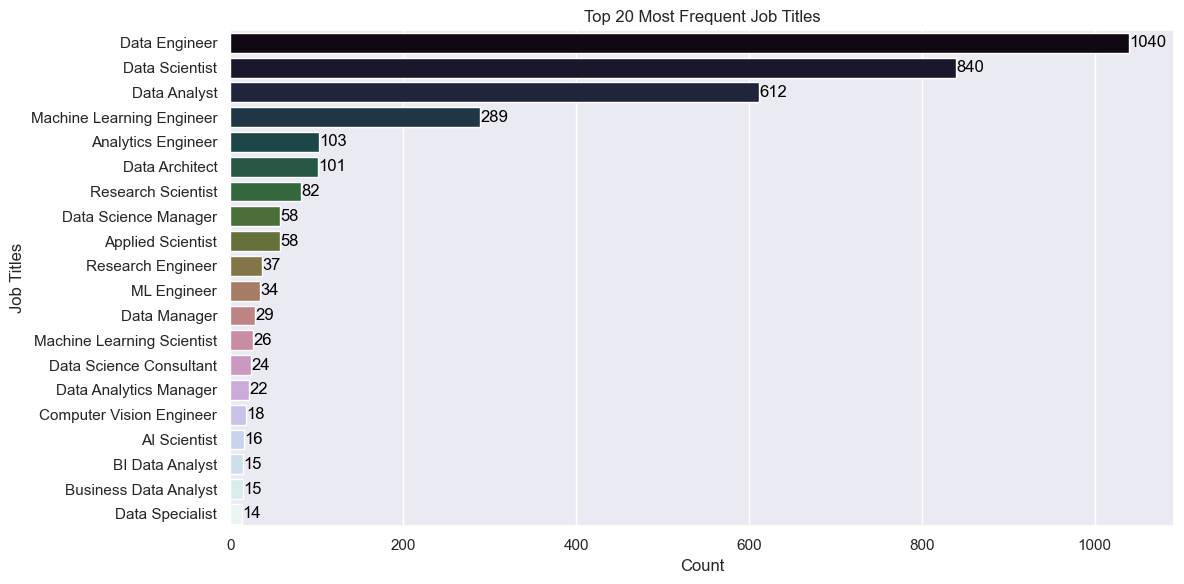

In [19]:
# Extract the "job title" column
job_titles = data['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title', palette='cubehelix')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

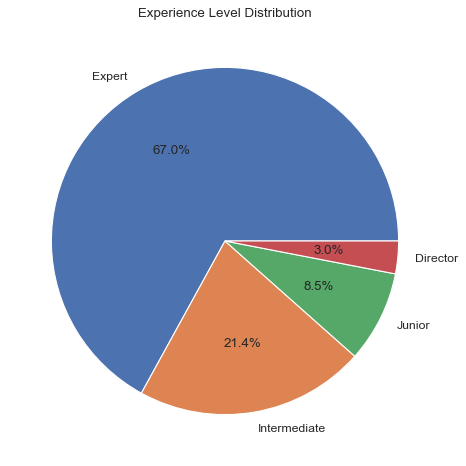

In [20]:
# Calculate the number of individuals in each experience level
level_counts = data['experience_level'].value_counts()

# Create a pie chart
plt.figure(figsize=(7,12),dpi=80)
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Experience Level Distribution')

plt.show()

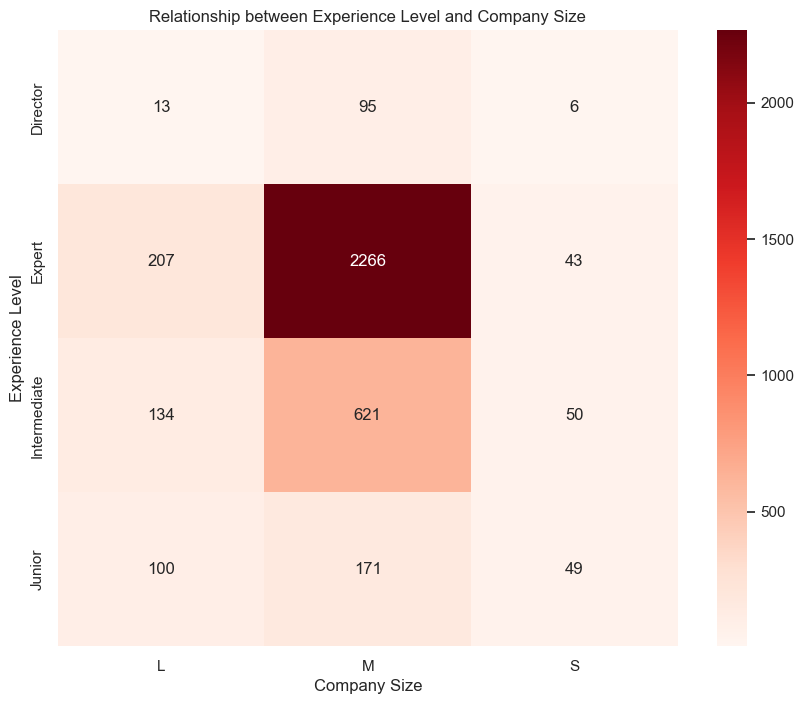

In [21]:
# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(data['experience_level'], data['company_size'])

# Create a heatmap using the cross-tabulation data
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Reds')

plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.title('Relationship between Experience Level and Company Size')

plt.show()

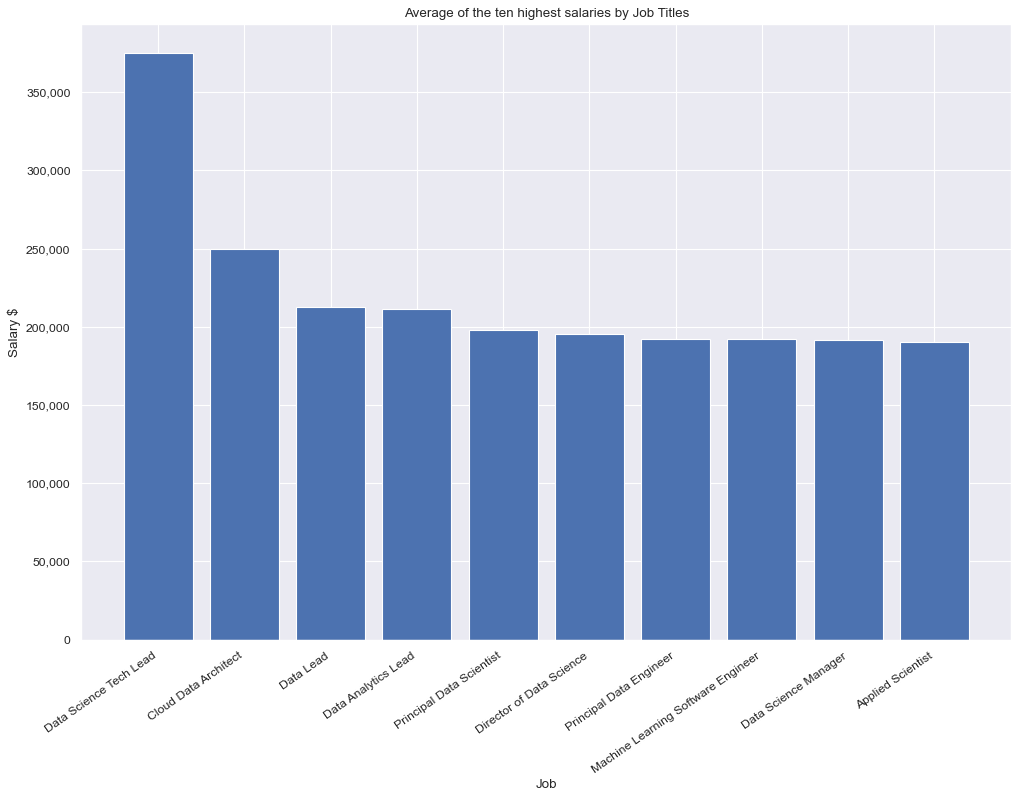

In [22]:
# Create bar chart
average_salary = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_ten_salaries = average_salary.head(10)

plt.figure(figsize=(15,10),dpi=80)
plt.bar(top_ten_salaries.index, top_ten_salaries)

# Add labels to the chart
plt.xlabel('Job')
plt.ylabel('Salary $')
plt.title('Average of the ten highest salaries by Job Titles')
plt.xticks(rotation=35, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

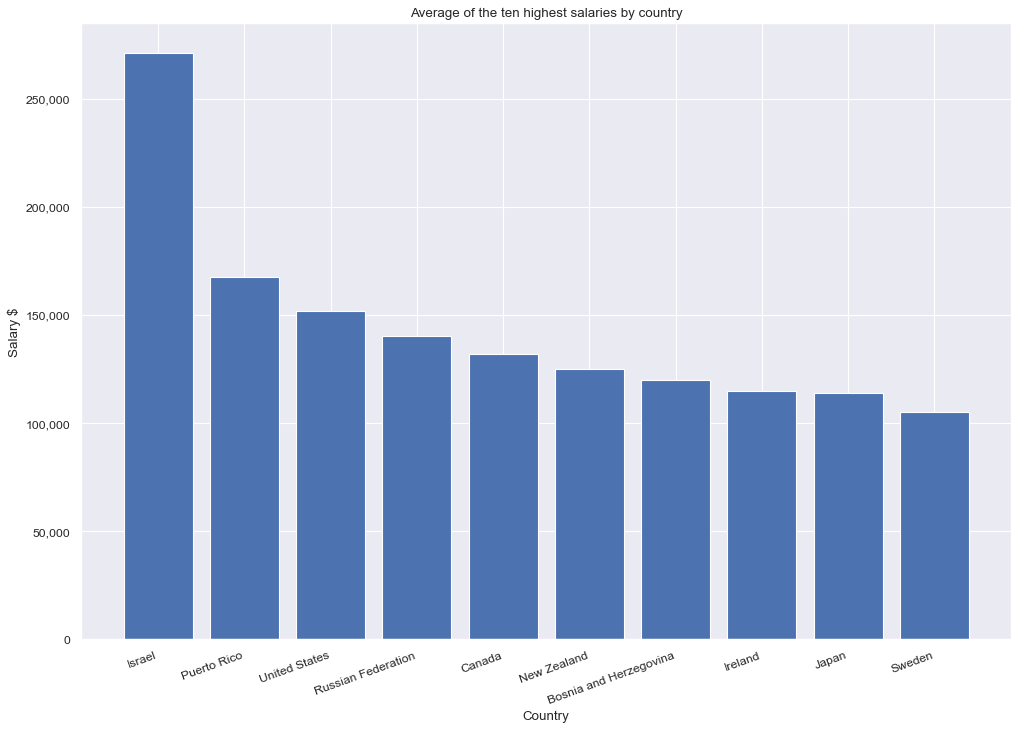

In [23]:
# Create bar chart
average_salary = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
top_ten_countries = average_salary.head(10)

plt.figure(figsize=(15,10),dpi=80)
plt.bar(top_ten_countries.index, top_ten_countries)

# Add labels to the chart
plt.xlabel('Country')
plt.ylabel('Salary $')
plt.title('Average of the ten highest salaries by country')
plt.xticks(rotation=20, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

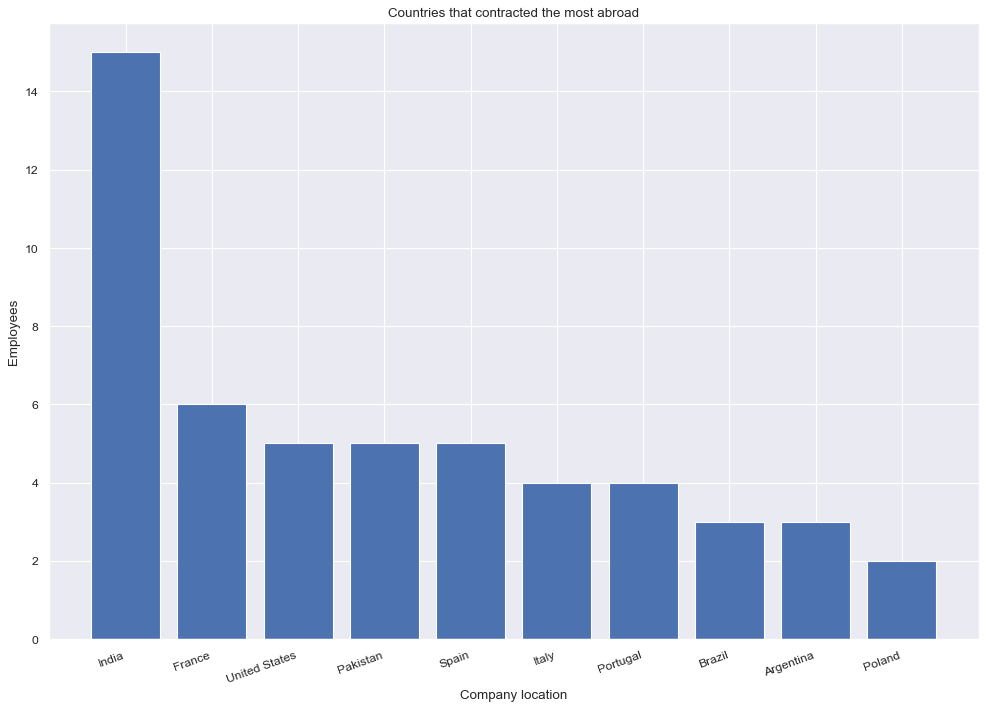

In [26]:
# Create bar chart
count = data[data['company_location'] != data['employee_residence']]['employee_residence'].value_counts()
foreign_contract = count.head(10)

plt.figure(figsize=(15,10),dpi=80)
plt.bar(foreign_contract.index, foreign_contract)

# Add labels to the chart
plt.xlabel('Company location')
plt.ylabel('Employees')
plt.title('Countries that contracted the most abroad')
plt.xticks(rotation=20, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

From this point on, the analysis begins with the most representative jobs in number. They represent more than 80% of employees. The jobs are:

Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, Analytics Engineer, Research Scientist, Data Science Manager, Applied Scientist.

In [27]:
common_jobs = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer','Research Scientist', 'Data Science Manager', 'Applied Scientist']
common_jobs = data[data['job_title'].isin(common_jobs)]

In [28]:
salary_common_jobs = common_jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
remote_common_jobs = common_jobs.groupby('job_title')['remote_ratio'].mean().sort_values(ascending=False)
salary_common_country = common_jobs.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

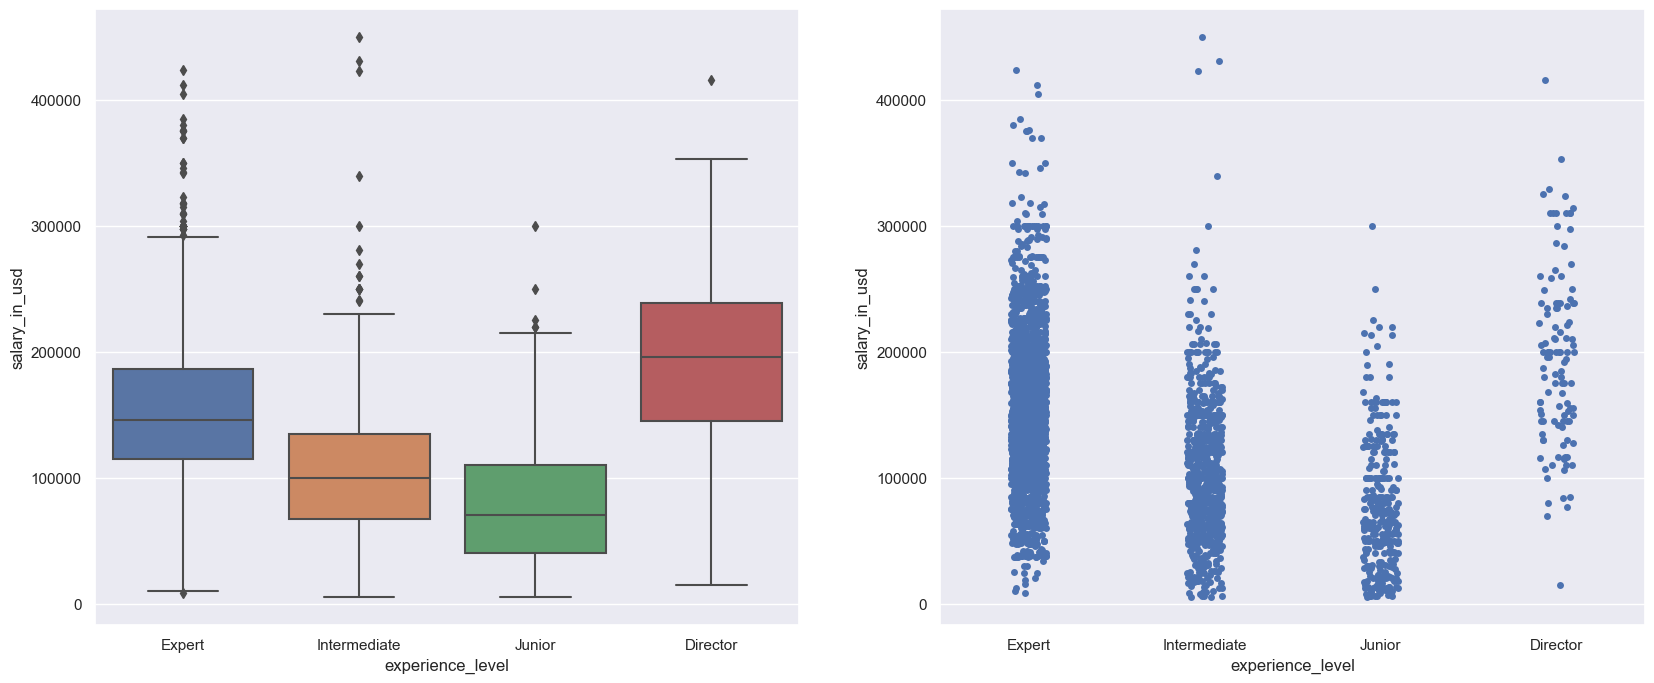

In [29]:
# Create bar chart for salary by experence level
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='experience_level',y='salary_in_usd', data=data)
sns.stripplot(ax=axes[1],x='experience_level',y='salary_in_usd', data=data)

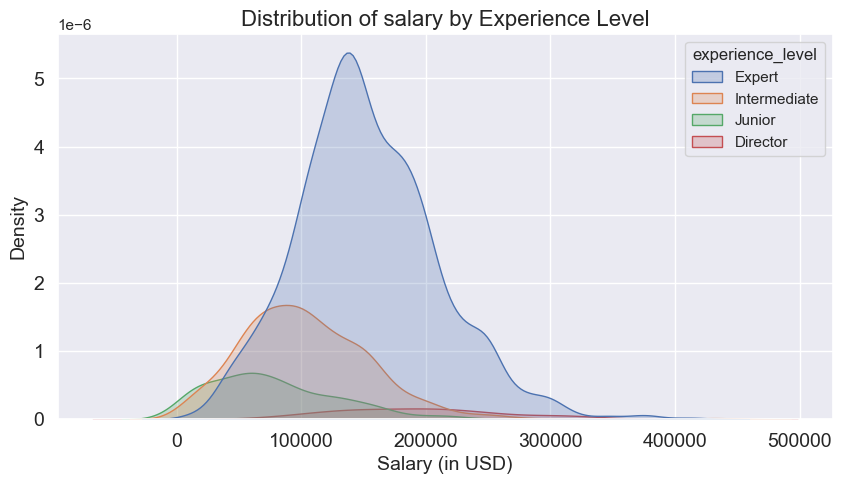

In [30]:

# Distribution of salary by Experience LEvel

plt.figure(figsize=(10,5))
sns.kdeplot(data=data, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

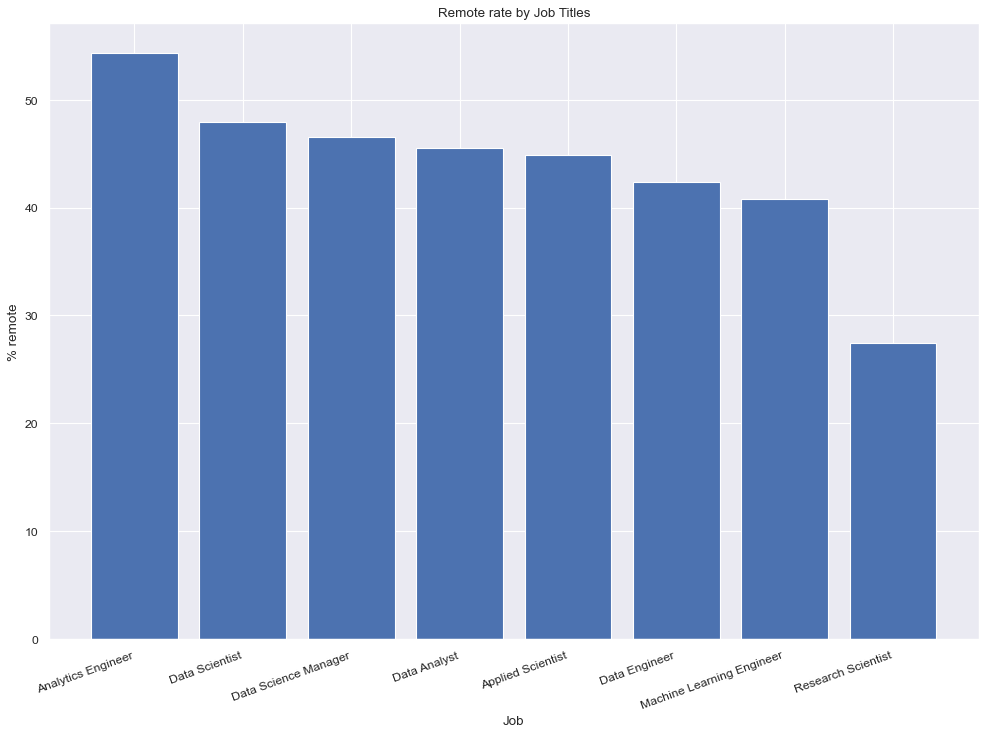

In [31]:
# Create bar chart
remote_common_jobs = common_jobs.groupby('job_title')['remote_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,10),dpi=80)
plt.bar(remote_common_jobs.index, remote_common_jobs)

# Add labels to the chart
plt.xlabel('Job')
plt.ylabel('% remote')
plt.title('Remote rate by Job Titles')
plt.xticks(rotation=20, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

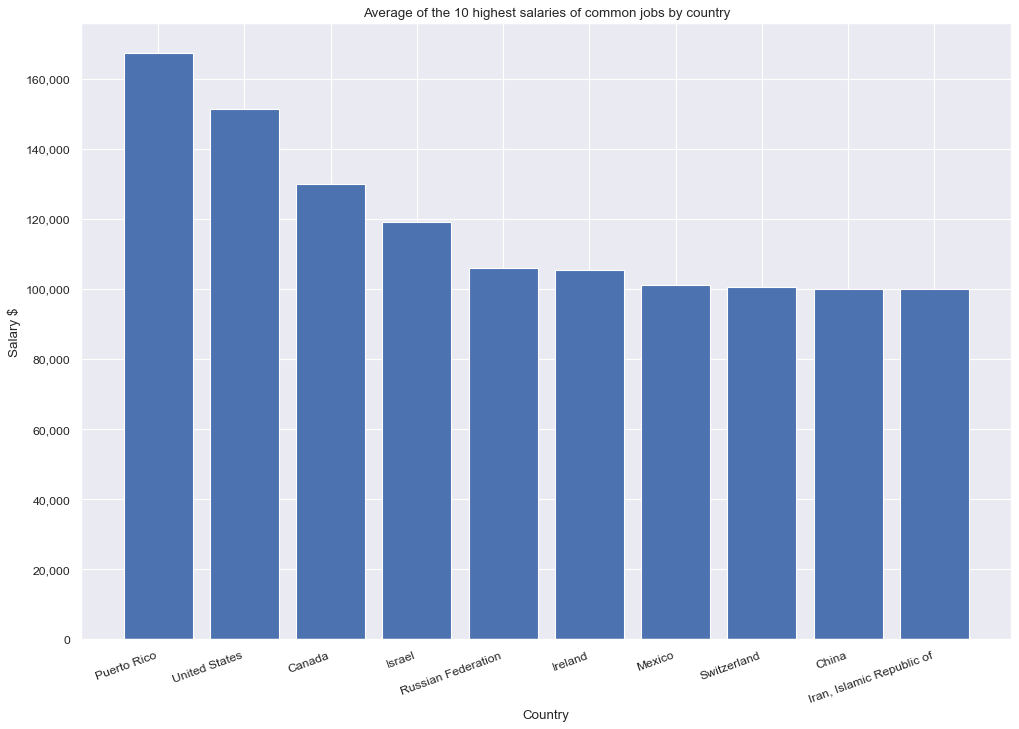

In [32]:
# Create bar chart
salary_common_country = common_jobs.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,10),dpi=80)
plt.bar(salary_common_country.head(10).index, salary_common_country.head(10))

# Add labels to the chart
plt.xlabel('Country')
plt.ylabel('Salary $')
plt.title('Average of the 10 highest salaries of common jobs by country')
plt.xticks(rotation=20, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

## Data Transformation

Data cleaning, data transformation.

In [38]:
#create copy of dataset

df_copy = data

#drop column that will not be considered a feature for LR model
df_copy = df_copy.drop(['work_year','salary','salary_currency','remote_ratio'], axis=1)
df_copy.shape

(3755, 7)

In [39]:
#Remove outliers with the interquantile Range methodology

Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy['salary_in_usd']< (Q1 - 1.5 * IQR)) | (df_copy['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
df_copy.shape

(3692, 7)

In [40]:
#Split data into train (80%) and test (20%) sets

target = ['salary_in_usd']
numeric_vars = ['salary_in_usd']
categorical_vars = ['experience_level','employment_type','job_title' ,'employee_residence','company_location','company_size']


X = df_copy[categorical_vars]
#X = df_copy[categorical_vars].copy().reset_index(drop=True)

X.head()

y = df_copy[target]
y.head()


,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000


In [41]:
#Numerical columns transformation
df_copy['salary_in_usd'] = np.log1p(df_copy['salary_in_usd'])

#double [] used because this function needs a 2-d array and salary column by itself is a 1-d array
scaler = StandardScaler()
df_copy['salary_in_usd'] = scaler.fit_transform(df_copy[['salary_in_usd']]) 

In [43]:
#Categorical column transformation

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = y.select_dtypes(include=['float64']).columns

#make one hot encoder variables
categorical_transformer = Pipeline(steps=[("hotencoder", OneHotEncoder(handle_unknown="ignore"))])



In [44]:
#preprocessor pipeline

preprocessor = ColumnTransformer(transformers=[ ("cat", categorical_transformer, cat_cols) ])
          

In [49]:
   X_train, X_test, y_train, y_test = train_test_split(
                                                        X,
                                                        y,
                                                        test_size=0.2,
                                                   )
    

## Model Training

Experimentation for model training


Linear regression - Predict success factors for higher salary

* Add Code
* Add Markdown
* Prepare data for regression
* Remove outliers from the dataset using IQR method.

One of the key assumptions of linear regression is that the outcome variable is normally distributed. If the outcome variable is not normally distributed, it can lead to biased or inefficient estimates of the regression coefficients and inflated standard errors. To make non-normal values normal, transform the outcome variable (eg. log transformation, Box-Cox).

Scale the outcome variable.

Split data to create training, validation, and test sets

In [50]:
#Make a base model
lr = LinearRegression()

#create the pipeline
lr_train = Pipeline(steps = [("preprocessor", preprocessor),
                                ("lr", lr)])



In [51]:
# fit the model with data 

reg_model = lr_train.fit(X_train,y_train)


In [53]:
#make a prediction with the test Dataset

pred = reg_model.predict(X_test)
print("Predicted values: ", pred[0:5].round(2))

Predicted values:  [[189706.46]
 [135800.08]
 [160947.72]
 [128601.73]
 [160947.72]]


In [54]:
y_test.salary_in_usd[0:5]

2068    196000
1817    130000
3024    123400
3191     93700
1170    156400
Name: salary_in_usd, dtype: int64

In [55]:
# make a metrics for model evaluation (MAPE)
y_true = y_test
y_pred = pred
print((1-mean_absolute_percentage_error(y_true, y_pred))*100)

62.029786286585


## Save model
Save model for future uses

In [62]:

# Save the model to a file
joblib.dump(reg_model, 'linear_regression_output.pkl')

['linear_regression_output.pkl']

## Load and Predict Data
Load saved model and predict with new data.

In [63]:
#load the model to use in the project
loaded_model = joblib.load('linear_regression_output.pkl')

#make a prediction with the test Dataset

pred = reg_model.predict(X_test)
print("Predicted values: ", pred[0:10].round(2))



Predicted values:  [[189706.46]
 [135800.08]
 [160947.72]
 [128601.73]
 [160947.72]
 [157160.72]
 [157160.72]
 [128601.73]
 [160947.72]
 [157160.72]]


In [60]:
# make a metrics for model evaluation (MAPE)
y_true = y_test
y_pred = pred
print((1-mean_absolute_percentage_error(y_true, y_pred))*100)

62.029786286585
